In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('profit.csv')
print(df)

       gold  estate    cryto  stock  profit
0     14.96   41.76  1024.07  73.17  463.26
1     25.18   62.96  1020.04  59.08  444.37
2      5.11   39.40  1012.16  92.14  488.56
3     20.86   57.32  1010.24  76.64  446.48
4     10.82   37.50  1009.23  96.62  473.90
...     ...     ...      ...    ...     ...
9563  16.65   49.69  1014.01  91.00  460.03
9564  13.19   39.18  1023.67  66.78  469.62
9565  31.32   74.33  1012.92  36.48  429.57
9566  24.48   69.45  1013.86  62.39  435.74
9567  21.60   62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gold    9568 non-null   float64
 1   estate  9568 non-null   float64
 2   cryto   9568 non-null   float64
 3   stock   9568 non-null   float64
 4   profit  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
print(df.describe(include='all'))

              gold       estate        cryto        stock       profit
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


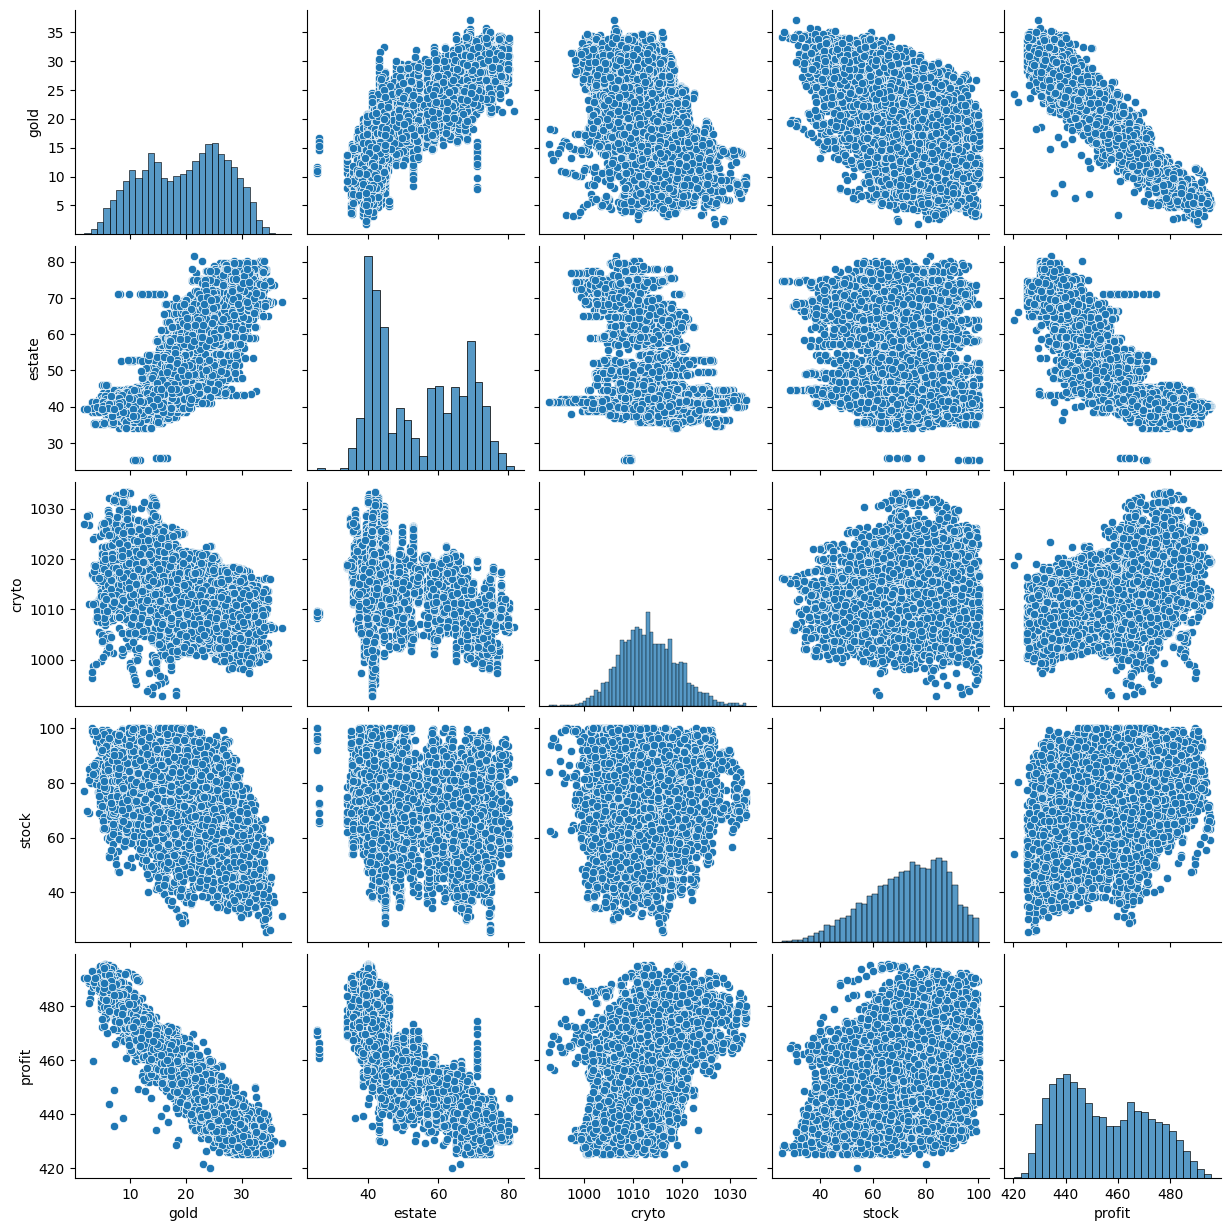

In [5]:
sns.pairplot(df)
plt.show()

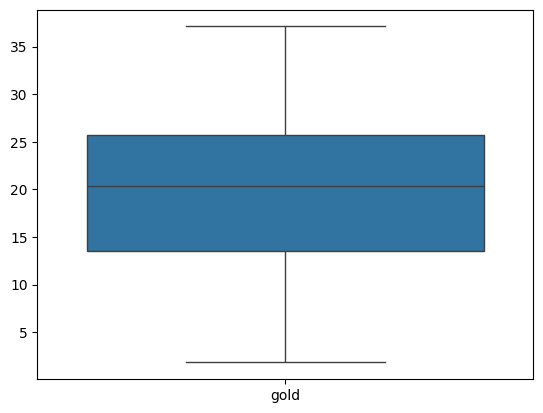

In [8]:
sns.boxplot(data=df[['gold']])
plt.show()


In [9]:
print(df.corr())

            gold    estate     cryto     stock    profit
gold    1.000000  0.844107 -0.507549 -0.542535 -0.948128
estate  0.844107  1.000000 -0.413502 -0.312187 -0.869780
cryto  -0.507549 -0.413502  1.000000  0.099574  0.518429
stock  -0.542535 -0.312187  0.099574  1.000000  0.389794
profit -0.948128 -0.869780  0.518429  0.389794  1.000000


In [11]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:

from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler() 
modelScale=scaler.fit(X)
scaled_data=modelScale.transform(X)
X_scaled = pd.DataFrame(data=scaled_data, columns=X. columns + ' _scaled')
print(X_scaled)

      gold _scaled  estate _scaled  cryto _scaled  stock _scaled
0         0.372521        0.291815       0.771591       0.638204
1         0.662040        0.669039       0.671863       0.449330
2         0.093484        0.249822       0.476862       0.892493
3         0.539660        0.568683       0.429349       0.684718
4         0.255241        0.216014       0.404355       0.952547
...            ...             ...            ...            ...
9563      0.420397        0.432918       0.522643       0.877212
9564      0.322380        0.245907       0.761693       0.552547
9565      0.835977        0.871352       0.495669       0.146381
9566      0.642210        0.784520       0.518931       0.493700
9567      0.560623        0.661210       0.602326       0.567158

[9568 rows x 4 columns]


In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, test_size=0.25, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression 
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
print(regressor.intercept_)
print(regressor.coef_)

503.0253780421949
[-70.45659436 -12.86610017   2.31258839 -11.83922497]


In [16]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred)

[455.66 438.72 434.15 ... 457.98 470.31 449.78]


In [17]:

import numpy as np
from sklearn import metrics
y_test_pred = regressor.predict(X_test)
print('Score or R-Squared:', regressor.score (X_test, y_test))
print('Mean Absolute Error:',
    metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:',
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:',
    metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared: 0.9291941662017059
Mean Absolute Error: 3.5858052750059493
Root Mean Squared Error: 4.536730756713893
Mean Absolute Percentage Error: 0.007910777984882923


In [18]:

from sklearn.model_selection import RandomizedSearchCV
model = LinearRegression()
param_space = {'copy_X': [True, False], 'fit_intercept': [True, False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True, False]}

random_search= RandomizedSearchCV (model, param_space,n_iter=100, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print (f"Best Hyperparameters: {random_search.best_params_}")
# Accuracy of the model after using best parameters 
print (f"Best Score: {random_search.best_score_}")

c:\Users\HKP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.9282782737319334


In [19]:

bestModel=LinearRegression()
bestModel.set_params (copy_X=True, fit_intercept=True,n_jobs=1, positive=False)
bestModel.fit(X_train,y_train)
print('Score or R-Squared on training dataset:', bestModel.score (X_train, y_train))
y_test_pred = bestModel.predict(X_test)
print('Score or R-Squared on test dataset:', bestModel.score (X_test, y_test))
print('Mean Absolute Error:',
    metrics.mean_absolute_error(y_test, y_test_pred))
print('Root Mean Squared Error:',
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:',
    metrics.mean_absolute_percentage_error(y_test, y_test_pred))

Score or R-Squared on training dataset: 0.9285035675944793
Score or R-Squared on test dataset: 0.9291941662017059
Mean Absolute Error: 3.5858052750059493
Root Mean Squared Error: 4.536730756713893
Mean Absolute Percentage Error: 0.007910777984882923


In [20]:

# Xây dựng ứng dụng dự báo profit
#gold=10.82 estate=37.50 cryto=1009.23 stock=96.62
gold = float(input())

estate=float(input())
cryto=float(input())
stock=float(input())
scaled_value=modelScale.transform([[gold, estate, cryto, stock]])
print(scaled_value)
predicted_value = bestModel.predict(scaled_value)
print("Predicted profit: ", predicted_value)

[[  0.09  -0.27 -24.    -0.21]]
Predicted profit:  [447.14]


c:\Users\HKP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\HKP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
